# Imports

In [40]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load in LLM Randomness Data

In [86]:
df = pd.read_csv('all-results.csv')
df.shape

(12589, 10)

# Genereate Programmatic Random Data

In [42]:
# Set the seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the number of runs to generate for each range
num_runs = 200

# Prepare a list to collect new rows for python-random and python-numpy
new_rows = []

# Loop over each unique range in the DataFrame
for _, row in df[['range_min', 'range_max']].drop_duplicates().iterrows():
    range_min = row['range_min']
    range_max = row['range_max']
    
    # Generate 'python-random' method results
    for _ in range(num_runs):
        response = random.uniform(range_min, range_max)
        normalized_response = (response - range_min) / (range_max - range_min)
        new_rows.append({
            'run': _,
            'generation_method': 'python-random',
            'range_min': range_min,
            'range_max': range_max,
            'response': response,
            'normalized_response': normalized_response,
            'is_valid': True

            # # add NaN vals for every column that isn't 'generation_method', 'range_min', 'range_max', 'response', 'normalized_response'
            # **{col: np.nan for col in df.columns if col not in ['generation_method', 'range_min', 'range_max', 'response', 'normalized_response']}
        })
    
    # Generate 'python-numpy' method results
    for _ in range(num_runs):
        response = np.random.uniform(range_min, range_max)
        normalized_response = (response - range_min) / (range_max - range_min)
        new_rows.append({
            'run': _,
            'generation_method': 'python-numpy',
            'range_min': range_min,
            'range_max': range_max,
            'response': response,
            'normalized_response': normalized_response,
            'is_valid': True

            # # add NaN vals for every column that isn't 'generation_method', 'range_min', 'range_max', 'response', 'normalized_response'
            # **{col: np.nan for col in df.columns if col not in ['generation_method', 'range_min', 'range_max', 'response', 'normalized_response']}
        })

# Create a DataFrame from the new rows
new_df = pd.DataFrame(new_rows)

# Update the existing DataFrame to use 'generation_method' instead of 'generation_method'
df = df.rename(columns={'generation_method': 'generation_method'})

# Append the new random data to the original DataFrame
df = pd.concat([df, new_df], ignore_index=True)

print(df.shape)

# Display the first few rows of the updated DataFrame to verify
print(df.head())

(12589, 9)
   run  generation_method                                             prompt  \
0    0  chatgpt-4o-latest  Generate a random number between 0 and 100. It...   
1    0  chatgpt-4o-latest  Generate a random number between 0 and 10. It ...   
2    0  chatgpt-4o-latest  Generate a random number between -745 and -556...   
3    0  chatgpt-4o-latest  Generate a random number between -359 and 39. ...   
4    0  chatgpt-4o-latest  Generate a random number between 328 and 508. ...   

   range_min  range_max  response  raw_response  is_valid  normalized_response  
0          0        100      94.0          94.0      True                  NaN  
1          0         10       3.0           3.0      True                  NaN  
2       -745       -556    -631.0        -631.0      True                  NaN  
3       -359         39    -230.0        -230.0      True                  NaN  
4        328        508     495.0         495.0      True                  NaN  


In [43]:
# normalized_response
# Calculate normalized_response column
df['normalized_response'] = (df['response'] - df['range_min']) / (df['range_max'] - df['range_min'])

# Display the first few rows to verify the calculation
print(df[['generation_method', 'range_min', 'range_max', 'response', 'normalized_response']].head())

   generation_method  range_min  range_max  response  normalized_response
0  chatgpt-4o-latest          0        100      94.0             0.940000
1  chatgpt-4o-latest          0         10       3.0             0.300000
2  chatgpt-4o-latest       -745       -556    -631.0             0.603175
3  chatgpt-4o-latest       -359         39    -230.0             0.324121
4  chatgpt-4o-latest        328        508     495.0             0.927778


In [44]:
# Calculate range_size by finding the absolute difference between range_max and range_min
df['range_size'] = df['range_max'] - df['range_min']

print(df['range_size'].unique().mean())

# Display the first few rows to verify the calculation
print(df[['range_min', 'range_max', 'range_size']].head())


490.42857142857144
   range_min  range_max  range_size
0          0        100         100
1          0         10          10
2       -745       -556         189
3       -359         39         398
4        328        508         180


In [45]:
# 1. Distribution of Random Values by Range
distribution = df.groupby(['generation_method', 'range_min', 'range_max'])['normalized_response'].apply(list).reset_index()
distribution['count'] = distribution['normalized_response'].apply(len)

# Display distribution for insight
print("Distribution of Random Values by Range:")
# print(distribution)
print(distribution)


Distribution of Random Values by Range:
    generation_method  range_min  range_max  \
0   chatgpt-4o-latest       -863        557   
1   chatgpt-4o-latest       -745       -556   
2   chatgpt-4o-latest       -647        489   
3   chatgpt-4o-latest       -359         39   
4   chatgpt-4o-latest          0         10   
..                ...        ...        ...   
58      python-random       -647        489   
59      python-random       -359         39   
60      python-random          0         10   
61      python-random          0        100   
62      python-random        328        508   

                                  normalized_response  count  
0   [0.397887323943662, 0.6971830985915493, 0.2795...    200  
1   [0.6031746031746031, 0.4444444444444444, 0.608...    200  
2   [0.7491197183098591, 0.3600352112676056, 0.272...    200  
3   [0.3241206030150754, 0.38190954773869346, 0.44...    200  
4   [0.3, 0.7, 0.6, 0.6, 0.4, 0.3, 0.3, 0.3, 0.2, ...    200  
..               

In [46]:
# 2. Mean and Standard Deviation of Responses for Each Range
stats = df.groupby(['generation_method', 'range_min', 'range_max'])['normalized_response'].agg(['mean', 'std']).reset_index()
print("Mean and Standard Deviation of Normalized Responses for Each Range:")
print(stats)

Mean and Standard Deviation of Normalized Responses for Each Range:
    generation_method  range_min  range_max      mean       std
0   chatgpt-4o-latest       -863        557  0.491528  0.243949
1   chatgpt-4o-latest       -745       -556  0.450635  0.246758
2   chatgpt-4o-latest       -647        489  0.406857  0.216187
3   chatgpt-4o-latest       -359         39  0.420276  0.220861
4   chatgpt-4o-latest          0         10  0.509000  0.273667
..                ...        ...        ...       ...       ...
58      python-random       -647        489  0.466212  0.288653
59      python-random       -359         39  0.514450  0.278685
60      python-random          0         10  0.524753  0.298947
61      python-random          0        100  0.484224  0.293369
62      python-random        328        508  0.542838  0.281793

[63 rows x 5 columns]


In [47]:
for method in df['generation_method'].unique():
    # print number of rows for each generation method
    print(f"Number of rows for {method}: {df[df['generation_method'] == method].shape[0]}")


Number of rows for chatgpt-4o-latest: 1400
Number of rows for gpt-4o-2024-08-06: 1400
Number of rows for gpt-4-0613: 1400
Number of rows for gpt-4o-mini-2024-07-18: 1400
Number of rows for gemma-2-2b-it: 1400
Number of rows for llama-3.2-3b-instruct: 1389
Number of rows for gemma-2-9b-it: 1400
Number of rows for python-random: 1400
Number of rows for python-numpy: 1400


# Analyses

In [48]:
# Group by model and range_size, calculate mean normalized_response
size_analysis = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['normalized_response'].mean().reset_index()
print("Normalized Mean by Generation Method and Range Size Bucket:")
print(size_analysis)


Normalized Mean by Generation Method and Range Size Bucket:
         generation_method   range_size  normalized_response
0        chatgpt-4o-latest      (0, 10]             0.509000
1        chatgpt-4o-latest    (10, 100]             0.447650
2        chatgpt-4o-latest  (100, 1000]             0.470332
3            gemma-2-2b-it      (0, 10]             0.638500
4            gemma-2-2b-it    (10, 100]             0.745200
5            gemma-2-2b-it  (100, 1000]             0.507432
6            gemma-2-9b-it      (0, 10]             0.506000
7            gemma-2-9b-it    (10, 100]             0.501750
8            gemma-2-9b-it  (100, 1000]             0.528974
9               gpt-4-0613      (0, 10]             0.616500
10              gpt-4-0613    (10, 100]             0.566250
11              gpt-4-0613  (100, 1000]             0.508390
12       gpt-4o-2024-08-06      (0, 10]             0.494000
13       gpt-4o-2024-08-06    (10, 100]             0.446200
14       gpt-4o-2024-08-0

/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/1100590331.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_analysis = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['normalized_response'].mean().reset_index()


In [49]:
# Group by model and range_size, calculate std deviation of normalized_response
std_analysis = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['normalized_response'].std().reset_index()
print("Standard Deviation by Generation Method and Range Size Bucket:")
print(std_analysis)


Standard Deviation by Generation Method and Range Size Bucket:
         generation_method   range_size  normalized_response
0        chatgpt-4o-latest      (0, 10]             0.273667
1        chatgpt-4o-latest    (10, 100]             0.283256
2        chatgpt-4o-latest  (100, 1000]             0.248853
3            gemma-2-2b-it      (0, 10]             0.145512
4            gemma-2-2b-it    (10, 100]             0.052658
5            gemma-2-2b-it  (100, 1000]             0.240418
6            gemma-2-9b-it      (0, 10]             0.175837
7            gemma-2-9b-it    (10, 100]             0.136498
8            gemma-2-9b-it  (100, 1000]             0.244998
9               gpt-4-0613      (0, 10]             0.156846
10              gpt-4-0613    (10, 100]             0.230194
11              gpt-4-0613  (100, 1000]             0.182368
12       gpt-4o-2024-08-06      (0, 10]             0.221833
13       gpt-4o-2024-08-06    (10, 100]             0.258361
14       gpt-4o-2024-0

/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/4037247814.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_analysis = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['normalized_response'].std().reset_index()


In [50]:
# Use range_size and normalized mean to check consistency
consistency_check = df.groupby(['generation_method', 'range_size'])['normalized_response'].agg(['mean', 'std']).reset_index()
print("Consistency Check Across Models by Range Size:")
print(consistency_check)


Consistency Check Across Models by Range Size:
    generation_method  range_size      mean       std
0   chatgpt-4o-latest          10  0.509000  0.273667
1   chatgpt-4o-latest         100  0.447650  0.283256
2   chatgpt-4o-latest         180  0.540083  0.262561
3   chatgpt-4o-latest         189  0.450635  0.246758
4   chatgpt-4o-latest         398  0.420276  0.220861
..                ...         ...       ...       ...
58      python-random         180  0.542838  0.281793
59      python-random         189  0.496545  0.284988
60      python-random         398  0.514450  0.278685
61      python-random        1136  0.466212  0.288653
62      python-random        1420  0.499500  0.275010

[63 rows x 4 columns]


In [51]:
# Group by model and range_size, calculate validity rate
validity_by_size = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['is_valid'].mean().reset_index()
print("Validity Rate by Generation Method and Range Size:")
print(validity_by_size)


Validity Rate by Generation Method and Range Size:
         generation_method   range_size  is_valid
0        chatgpt-4o-latest      (0, 10]  1.000000
1        chatgpt-4o-latest    (10, 100]  1.000000
2        chatgpt-4o-latest  (100, 1000]  1.000000
3            gemma-2-2b-it      (0, 10]  1.000000
4            gemma-2-2b-it    (10, 100]  1.000000
5            gemma-2-2b-it  (100, 1000]  1.000000
6            gemma-2-9b-it      (0, 10]  1.000000
7            gemma-2-9b-it    (10, 100]  1.000000
8            gemma-2-9b-it  (100, 1000]  1.000000
9               gpt-4-0613      (0, 10]  1.000000
10              gpt-4-0613    (10, 100]  1.000000
11              gpt-4-0613  (100, 1000]  1.000000
12       gpt-4o-2024-08-06      (0, 10]  1.000000
13       gpt-4o-2024-08-06    (10, 100]  1.000000
14       gpt-4o-2024-08-06  (100, 1000]  0.998333
15  gpt-4o-mini-2024-07-18      (0, 10]  1.000000
16  gpt-4o-mini-2024-07-18    (10, 100]  1.000000
17  gpt-4o-mini-2024-07-18  (100, 1000]  1.000000

/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/2707728905.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  validity_by_size = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['is_valid'].mean().reset_index()


In [52]:
# Analyze model-specific patterns with range size
model_pattern = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['response'].apply(lambda x: x.mode().values[0]).reset_index()
print("Most Frequent Response by Generation Method and Range Size Bucket:")
print(model_pattern)

Most Frequent Response by Generation Method and Range Size Bucket:
         generation_method   range_size    response
0        chatgpt-4o-latest      (0, 10]    3.000000
1        chatgpt-4o-latest    (10, 100]   57.000000
2        chatgpt-4o-latest  (100, 1000] -732.000000
3            gemma-2-2b-it      (0, 10]    7.000000
4            gemma-2-2b-it    (10, 100]   78.000000
5            gemma-2-2b-it  (100, 1000]  467.000000
6            gemma-2-9b-it      (0, 10]    7.000000
7            gemma-2-9b-it    (10, 100]   37.000000
8            gemma-2-9b-it  (100, 1000]  417.000000
9               gpt-4-0613      (0, 10]    7.000000
10              gpt-4-0613    (10, 100]   37.000000
11              gpt-4-0613  (100, 1000] -657.000000
12       gpt-4o-2024-08-06      (0, 10]    7.000000
13       gpt-4o-2024-08-06    (10, 100]   42.000000
14       gpt-4o-2024-08-06  (100, 1000]  472.000000
15  gpt-4o-mini-2024-07-18      (0, 10]    7.000000
16  gpt-4o-mini-2024-07-18    (10, 100]   57.0000

/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/2446052821.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_pattern = df.groupby(['generation_method', pd.cut(df['range_size'], bins=[0, 10, 100, 1000])])['response'].apply(lambda x: x.mode().values[0]).reset_index()


# Plots

In [53]:
# At the start of your notebook, after your imports, add:
# Define a consistent color palette for generation methods
custom_palette = {
    "chatgpt-4o-latest": "#1f77b4",  # Blue
    "gpt-4-0613": "#ff7f0e",         # Orange
    "gpt-4o-2024-08-06": "#2ca02c",  # Green
    "gpt-4o-mini-2024-07-18": "#9467bd",  # Purple
    "python-numpy": "#d62728",       # Red
    "python-random": "#8c564b",       # Brown
    "gemma-2-2b-it": "#e377c2",      # Pink
    "llama-3.2-3b-instruct": "#7f7f7f", # Gray
    "gemma-2-9b-it": "#000000" # Black
}

# Set this palette in Seaborn
sns.set_palette(list(custom_palette.values()))

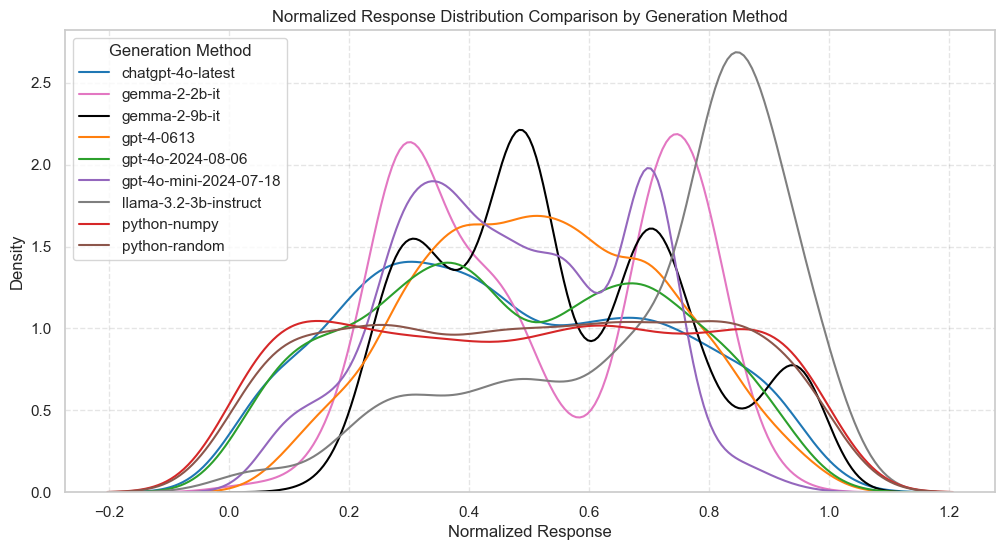

In [54]:
# plt.figure(figsize=(12, 6))

# # subset df to only include rows where values are valid
# df_valid = df[df['is_valid'] == True]

# # Create KDE plot for each generation method
# for method in sorted(df['generation_method'].unique()):

#     sns.kdeplot(data=df_valid[df_valid['generation_method'] == method]['normalized_response'],
#                 alpha=1, label=method, palette=custom_palette[method])

# # Set plot details
# plt.xlabel('Normalized Response')
# plt.ylabel('Density')
# plt.title('Normalized Response Distribution Comparison by Generation Method')
# plt.legend(title='Generation Method', loc='upper left')
# plt.grid(True, which='both', ls='--', c='gray', alpha=0.2)
# plt.savefig('imgs/normalized_response_distribution_comparison_all_methods.png')
# plt.show()

plt.figure(figsize=(12, 6))

# subset df to only include rows where values are valid
df_valid = df[df['is_valid'] == True]

# Create KDE plot for each generation method
for method in sorted(df['generation_method'].unique()):
    sns.kdeplot(data=df_valid[df_valid['generation_method'] == method]['normalized_response'],
                alpha=1, 
                label=method, 
                color=custom_palette[method])  # Use color instead of palette

# Set plot details
plt.xlabel('Normalized Response')
plt.ylabel('Density')
plt.title('Normalized Response Distribution Comparison by Generation Method')
plt.legend(title='Generation Method', loc='upper left')
plt.grid(True, which='both', ls='--', c='gray', alpha=0.2)
plt.savefig('imgs/normalized_response_distribution_comparison_all_methods.png')
plt.show()

In [72]:
# all 'llama-3.2-3b-instruct' invalid responses
df[df['generation_method'] == 'llama-3.2-3b-instruct']['is_valid'].value_counts()

is_valid
True     1018
False     371
Name: count, dtype: int64

In [79]:
invalids = df[(df['generation_method'] == 'llama-3.2-3b-instruct') & (df['is_valid'] == False)][['range_min', 'range_max']].value_counts().to_dict()
for rng, count in invalids.items():
    print(f"{rng}: {count}")



(-359, 39): 149
(-863, 557): 127
(-647, 489): 84
(328, 508): 4
(-745, -556): 3
(0, 10): 3
(0, 100): 1


/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/1623206718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['range_label'] = df_valid.apply(lambda x: f"[{x['range_min']}, {x['range_max']}]", axis=1)
/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/1623206718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['generation_method'] = pd.Categorical(df_valid['generation_method'], categories=sorted(df_valid['generation_method'].unique()))


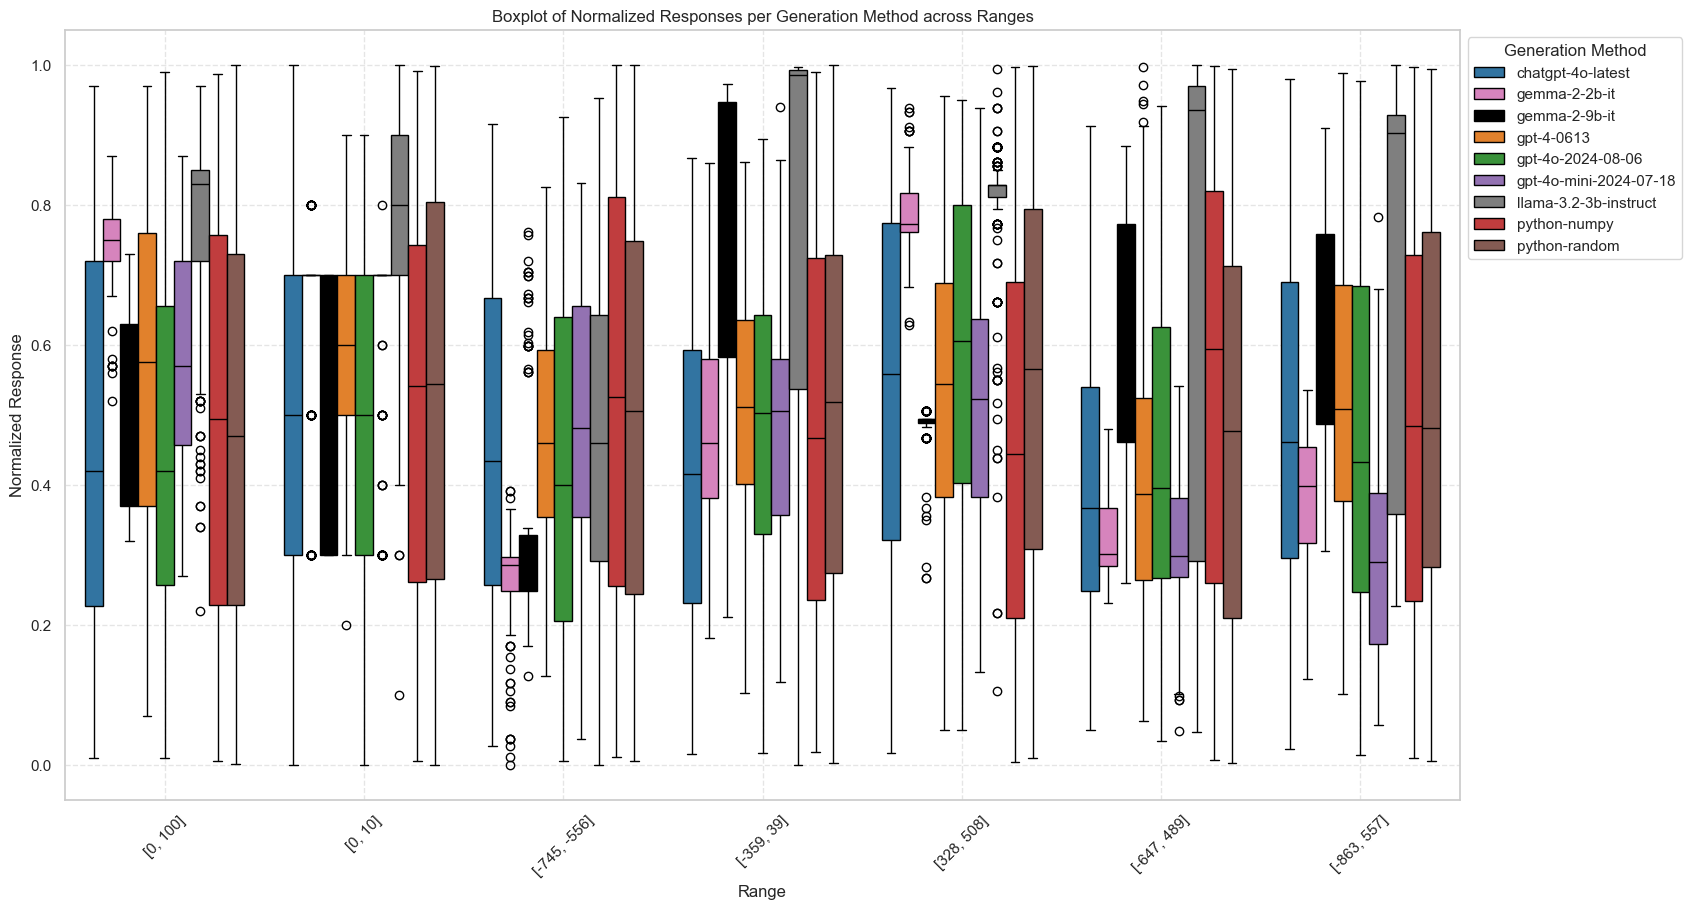

In [62]:
# Create a new column for range labels
df_valid['range_label'] = df_valid.apply(lambda x: f"[{x['range_min']}, {x['range_max']}]", axis=1)

# sort generation methods by alphabetical order
df_valid['generation_method'] = pd.Categorical(df_valid['generation_method'], categories=sorted(df_valid['generation_method'].unique()))

plt.figure(figsize=(18, 10))
sns.boxplot(x='range_label', y='normalized_response', hue='generation_method', data=df_valid, palette=custom_palette)
plt.title('Boxplot of Normalized Responses per Generation Method across Ranges')
plt.xlabel('Range')
plt.ylabel('Normalized Response')
plt.grid(True, which='both', ls='--', c='gray', alpha=0.2)
# plt.legend(title='Generation Method', loc='upper right')
# plt.legend(title='Generation Method', loc='upper left')
plt.legend(title="Generation Method", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.savefig('imgs/boxplot_normalized_response_vs_range.png')
plt.show()

/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/1129447818.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_response = df_valid.groupby(['generation_method', 'range_size'])['normalized_response'].mean().reset_index()


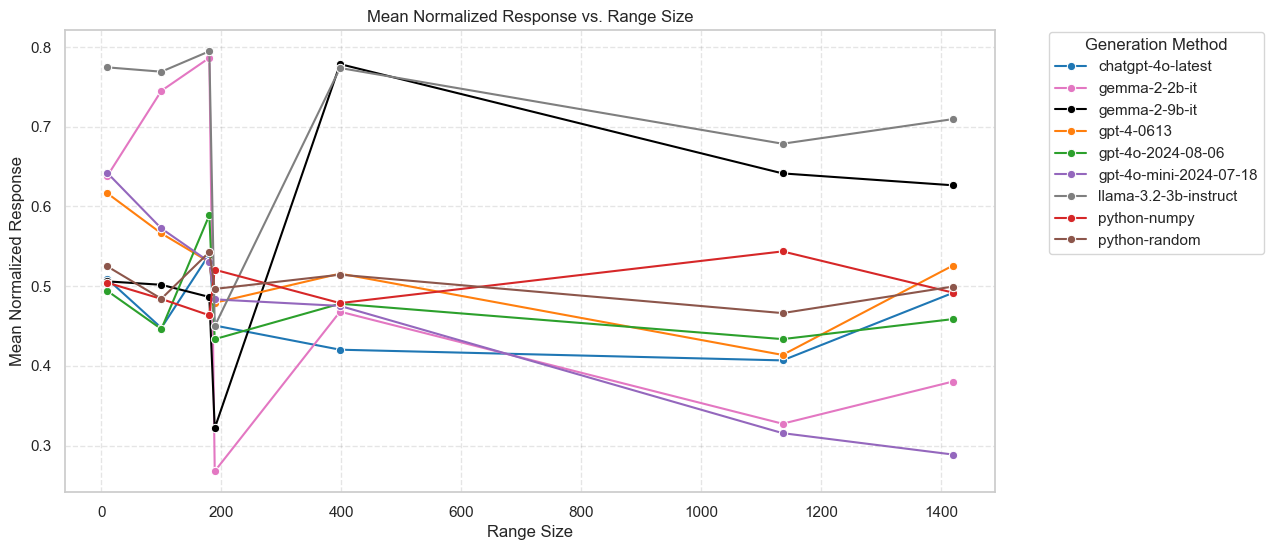

In [84]:
# Calculate mean normalized response per model and range size
mean_response = df_valid.groupby(['generation_method', 'range_size'])['normalized_response'].mean().reset_index()

# sort methods by alphabetical order
mean_response['generation_method'] = pd.Categorical(mean_response['generation_method'], categories=sorted(mean_response['generation_method'].unique()))

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_response, x='range_size', y='normalized_response', hue='generation_method', marker='o', palette=custom_palette, alpha=1)
plt.title('Mean Normalized Response vs. Range Size')
plt.xlabel('Range Size')
plt.ylabel('Mean Normalized Response')
plt.grid(True, which='both', ls='--', c='gray', alpha=0.2)
plt.legend(title='Generation Method', loc='lower left', bbox_to_anchor=(1.05, 0.5))  # Changed legend position
plt.savefig('imgs/mean_normalized_response_vs_range_size.png', bbox_inches='tight')  # bbox_inches='tight' prevents legend cutoff
plt.show()

In [57]:
# Ensure 'response' is an integer (if it's not already)
df_valid['response_int'] = df_valid['response'].astype(int)

# Function to check if a number is prime
def is_prime(n):
    n = abs(int(n))  # Consider absolute value and ensure it's an integer
    if n <= 1:
        return False
    if n == 2:
        return True
    # Even numbers greater than 2 are not prime
    if n % 2 == 0:
        return False
    sqrt_n = int(np.sqrt(n)) + 1
    # Check odd numbers up to the square root of n
    for i in range(3, sqrt_n, 2):
        if n % i == 0:
            return False
    return True

# Apply the is_prime function to the 'response_int' column
df_valid['is_prime'] = df_valid['response_int'].apply(is_prime)

# Check if the number ends with 5 or 0
df_valid['ends_with_5_or_0'] = df_valid['response_int'].apply(lambda x: str(abs(x))[-1] in ['0', '5'])

# Now compute frequencies across generation methods
# Multiply by 100 to get percentages

# Frequency of prime numbers
prime_freq = df_valid.groupby('generation_method')['is_prime'].mean().reset_index()
prime_freq['prime_percentage'] = prime_freq['is_prime'] * 100

# Frequency of numbers ending with 5 or 0
ends_with_5_or_0_freq = df_valid.groupby('generation_method')['ends_with_5_or_0'].mean().reset_index()
ends_with_5_or_0_freq['ends_with_5_or_0_percentage'] = ends_with_5_or_0_freq['ends_with_5_or_0'] * 100

# Display the frequencies
print("Frequency of Prime Numbers by Generation Method:")
prime_freq[['generation_method', 'prime_percentage']]

Frequency of Prime Numbers by Generation Method:


/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/2450555763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['response_int'] = df_valid['response'].astype(int)
/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/2450555763.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['is_prime'] = df_valid['response_int'].apply(is_prime)
/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/2450555763.py:25: SettingWithCopyWarning: 
A value is trying to be se

,generation_method,prime_percentage
0,chatgpt-4o-latest,25.714286
1,gemma-2-2b-it,31.071429
2,gemma-2-9b-it,30.571429
3,gpt-4-0613,26.571429
4,gpt-4o-2024-08-06,25.446748
5,gpt-4o-mini-2024-07-18,29.428571
6,llama-3.2-3b-instruct,26.620825
7,python-numpy,20.857143
8,python-random,23.357143


In [58]:
print("\nFrequency of Numbers Ending with 5 or 0 by Generation Method:")
ends_with_5_or_0_freq[['generation_method', 'ends_with_5_or_0_percentage']]


Frequency of Numbers Ending with 5 or 0 by Generation Method:


,generation_method,ends_with_5_or_0_percentage
0,chatgpt-4o-latest,13.500000
1,gemma-2-2b-it,15.071429
2,gemma-2-9b-it,8.214286
3,gpt-4-0613,17.071429
4,gpt-4o-2024-08-06,14.224446
5,gpt-4o-mini-2024-07-18,7.214286
6,llama-3.2-3b-instruct,13.948919
7,python-numpy,20.071429
8,python-random,18.214286


In [59]:
# unique generation methods
for method in df_valid['generation_method'].unique():
    print(f"Number of rows for {method}: {df_valid[df_valid['generation_method'] == method].shape[0]}")

print()
# unique range_min and range_max pairs
for (range_min, range_max), group in df_valid.groupby(['range_min', 'range_max']):
    print(f"Number of rows for range {range_min} to {range_max}: {group.shape[0]}")

Number of rows for chatgpt-4o-latest: 1400
Number of rows for gpt-4o-2024-08-06: 1399
Number of rows for gpt-4-0613: 1400
Number of rows for gpt-4o-mini-2024-07-18: 1400
Number of rows for gemma-2-2b-it: 1400
Number of rows for llama-3.2-3b-instruct: 1018
Number of rows for gemma-2-9b-it: 1400
Number of rows for python-random: 1400
Number of rows for python-numpy: 1400

Number of rows for range -863 to 557: 1672
Number of rows for range -745 to -556: 1795
Number of rows for range -647 to 489: 1715
Number of rows for range -359 to 39: 1646
Number of rows for range 0 to 10: 1797
Number of rows for range 0 to 100: 1797
Number of rows for range 328 to 508: 1795


/var/folders/b4/ggrsvntd42qcjhmfpxg1mc5h0000gn/T/ipykernel_1945/3151411305.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for method, method_group in group.groupby('generation_method'):


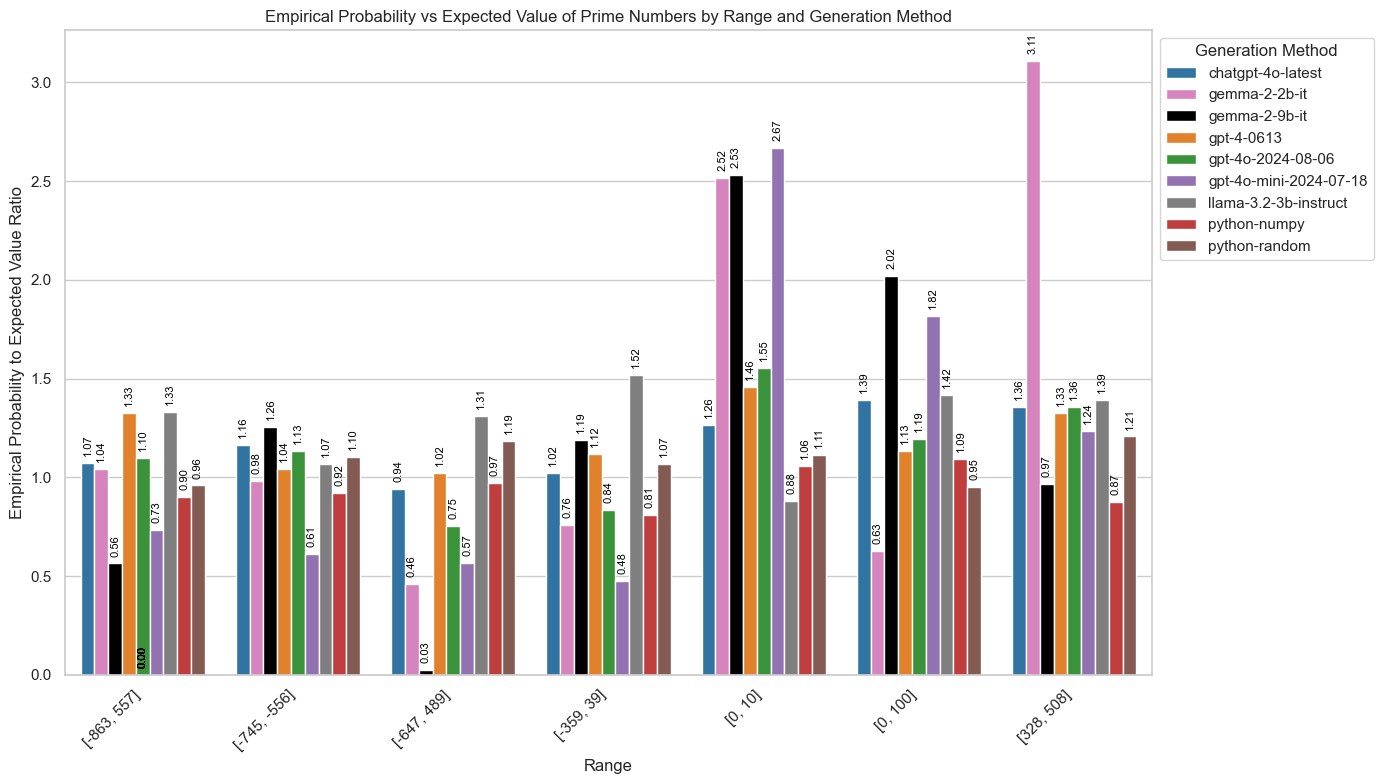

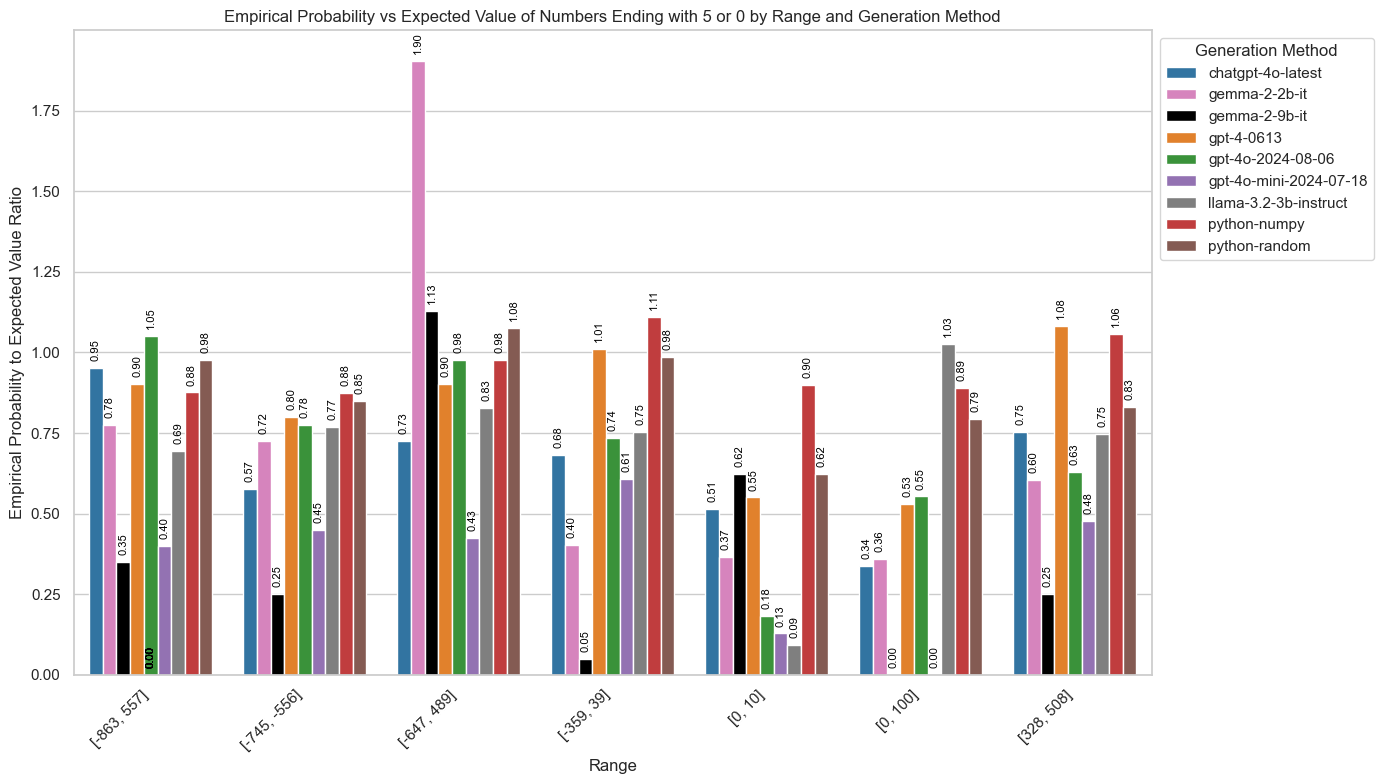

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# Function to calculate the ground truth statistics for a specified range
def calculate_range_statistics(range_min, range_max):
    numbers = range(range_min, range_max + 1)
    total_numbers = len(numbers)
    
    # Calculate percentage of primes in the range
    prime_count = sum(is_prime(n) for n in numbers)
    prime_percentage = (prime_count / total_numbers) * 100
    
    # Calculate percentage of numbers ending in 0
    ends_with_0_count = sum(str(abs(n)).endswith('0') for n in numbers)
    ends_with_0_percentage = (ends_with_0_count / total_numbers) * 100
    
    # Calculate percentage of numbers ending in 5 or 0
    ends_with_5_or_0_count = sum(str(abs(n))[-1] in ['0', '5'] for n in numbers)
    ends_with_5_or_0_percentage = (ends_with_5_or_0_count / total_numbers) * 100
    
    return {
        'prime_percentage_range': prime_percentage,
        'ends_with_5_or_0_percentage_range': ends_with_5_or_0_percentage
    }

# Adjusted calculation code for empirical/theoretical ratios
comparison_results = []

for (range_min, range_max), group in df_valid.groupby(['range_min', 'range_max']):
    # Calculate theoretical percentages for this specific range
    range_stats = calculate_range_statistics(range_min, range_max)
    
    # Get the count of primes and numbers ending in 5 or 0 in the range for relative calculation
    range_prime_count = sum(is_prime(n) for n in range(range_min, range_max + 1))
    range_ends_with_5_or_0_count = sum(str(abs(n))[-1] in ['0', '5'] for n in range(range_min, range_max + 1))
    
    # Calculate empirical/theoretical ratios of each special number type generated by each method within this range
    for method, method_group in group.groupby('generation_method'):
        # Calculate empirical likelihood (percentage) of primes generated by this method in the range
        generated_prime_count = method_group['is_prime'].sum()
        prime_percentage_method = (generated_prime_count / len(method_group) * 100)
        prime_ratio = prime_percentage_method / range_stats['prime_percentage_range'] if range_stats['prime_percentage_range'] > 0 else np.nan
        
        # Calculate empirical likelihood (percentage) of numbers ending with 5 or 0 generated by this method in the range
        generated_ends_with_5_or_0_count = method_group['ends_with_5_or_0'].sum()
        ends_with_5_or_0_percentage_method = (generated_ends_with_5_or_0_count / len(method_group) * 100)
        ends_with_5_or_0_ratio = ends_with_5_or_0_percentage_method / range_stats['ends_with_5_or_0_percentage_range'] if range_stats['ends_with_5_or_0_percentage_range'] > 0 else np.nan
        
        # Store the comparison data
        comparison_results.append({
            'range_min': range_min,
            'range_max': range_max,
            'range_label': f"[{range_min}, {range_max}]",  # Use combined range label for clarity
            'generation_method': method,
            'prime_ratio': prime_ratio,
            'ends_with_5_or_0_ratio': ends_with_5_or_0_ratio,
        })

# Convert the results into a DataFrame for easier analysis
comparison_df = pd.DataFrame(comparison_results)

def plot_ratio_comparison(df, range_column, method_column, ratio_column, title, legend_outside=False):
    plt.figure(figsize=(14, 8))
    
    # Plot using seaborn
    ax = sns.barplot(
        data=df,
        x=range_column,
        y=ratio_column,
        hue=method_column,
        errorbar=None,  # Updated from ci=None
        palette=custom_palette,
        alpha=1,
    )
    
    # Add data labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):  # Avoid placing labels on empty bars
            ax.annotate(f'{height:.2f}', 
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom',
                       fontsize=8, color='black',
                       rotation=90,
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords='offset points')

    plt.title(title)
    plt.xlabel("Range")
    plt.ylabel("Empirical Probability to Expected Value Ratio")
    plt.xticks(rotation=45, ha="right")
    
    if legend_outside:
        plt.legend(title="Generation Method", loc='upper left', bbox_to_anchor=(1, 1))
    else:
        plt.legend(title="Generation Method")
    
    plt.tight_layout()  # Adjust layout for readability
    plt.savefig(f"imgs/{title}.png", dpi=300, bbox_inches='tight')
    plt.show()

# Plot for prime number ratio
plot_ratio_comparison(
    comparison_df,
    range_column="range_label",
    method_column="generation_method",
    ratio_column="prime_ratio",
    title="Empirical Probability vs Expected Value of Prime Numbers by Range and Generation Method",
    legend_outside=True
)

# Plot for numbers ending with 5 or 0 ratio
plot_ratio_comparison(
    comparison_df,
    range_column="range_label",
    method_column="generation_method",
    ratio_column="ends_with_5_or_0_ratio",
    title="Empirical Probability vs Expected Value of Numbers Ending with 5 or 0 by Range and Generation Method",
    legend_outside=True
)